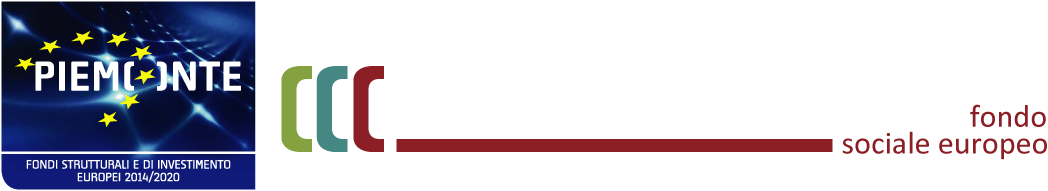





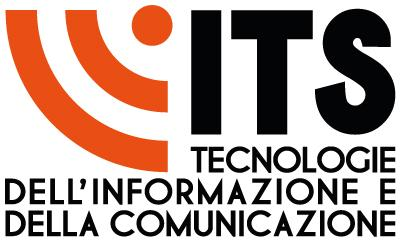




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** Statistica descrittiva 2

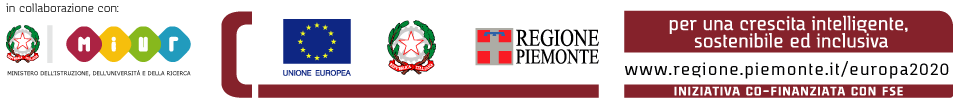



---


# **Data Setup**


---



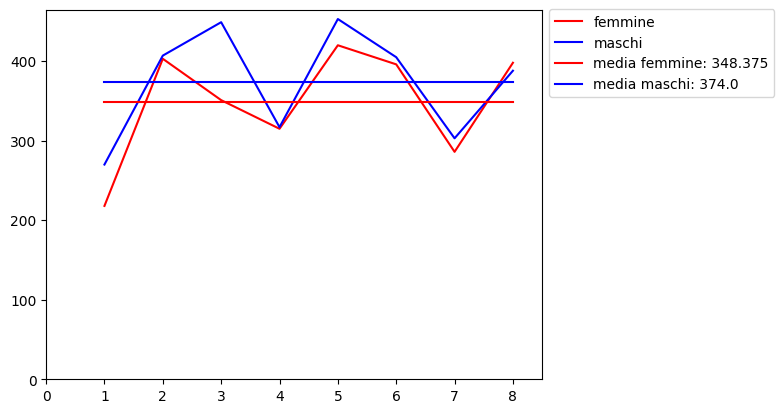

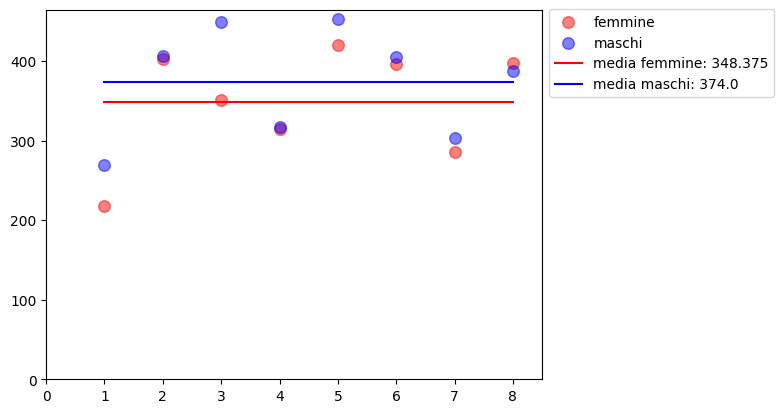

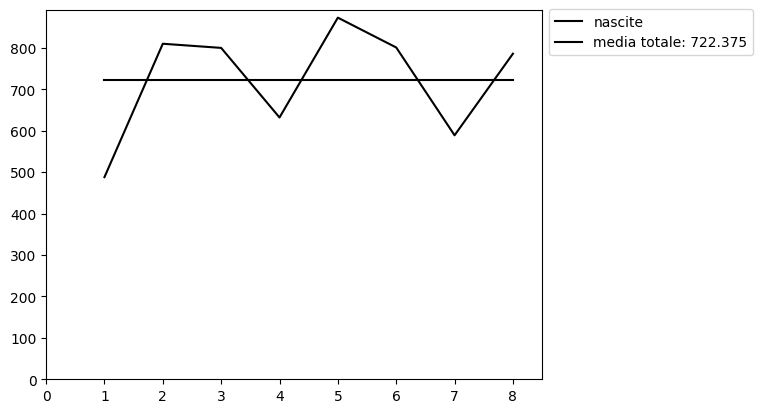

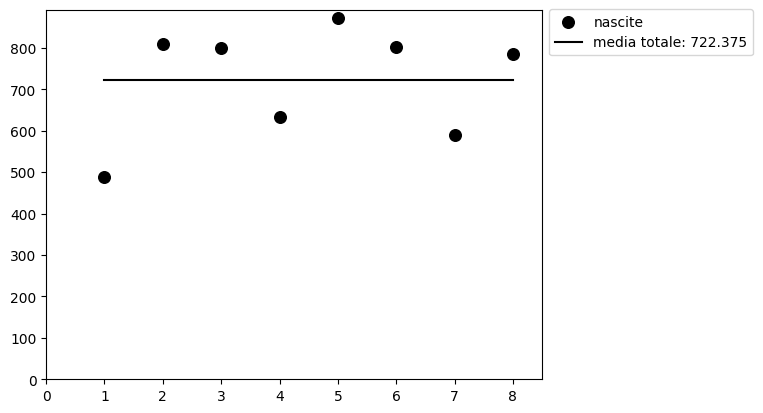

In [48]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# ====================
# FUNZIONI PER DATAVIZ
# ====================


def plot(x: np.array, ys: List[np.array], rette: List[float]):
  if(len(ys) == 2):
    plt.plot(x, ys[0], label="femmine", color="red")
    plt.plot(x, ys[1], label="maschi",  color="blue")
    plt.plot(x, np.full(x.size, rette[0]), color="red",  label= "media femmine: " + str(rette[0]))
    plt.plot(x, np.full(x.size, rette[1]), color="blue",  label= "media maschi: " + str(rette[1]))
  if(len(ys) == 1):
    plt.plot(x, ys[0], label="nascite", color="black")
    plt.plot(x, np.full(x.size, rette[0]), color="black", label= "media totale: " + str(rette[0]))

  plt.ylim(ymin=0)
  plt.xlim(xmin=0, xmax=x.size + 0.5)
  plt.legend(bbox_to_anchor=(1., 1.02))
  plt.show()


def scatter_plot(x: np.array, ys: List[np.array], rette: List[float]):
  if(len(ys) == 2):
    plt.scatter(x, ys[0], label="femmine", color="red", alpha=0.5, s=70)
    plt.scatter(x, ys[1], label="maschi",  color="blue", alpha=0.5, s=70)
    plt.plot(x, np.full(x.size, rette[0]), color="red",  label= "media femmine: " + str(rette[0]))
    plt.plot(x, np.full(x.size, rette[1]), color="blue",  label= "media maschi: " + str(rette[1]))
  else:
    plt.scatter(x, ys[0], label="nascite", color="black", s=70)
    plt.plot(x, np.full(x.size, rette[0]), color="black", label= "media totale: " + str(rette[0]))

  plt.ylim(ymin=0)
  plt.xlim(xmin=0, xmax=x.size + 0.5)
  plt.legend(bbox_to_anchor=(1., 1.02))
  plt.show()



# ==================================
# CARICAMENTO E MODIFICA DEL DATASET
# ==================================
def carica_modifica_dataset(url: str, separatore: str) -> pd.DataFrame:
  df = pd.read_csv(url, sep=separatore)

  df = df.rename(str.strip, axis = 'columns')
  return df

df_nascite_2020 = carica_modifica_dataset("http://www.comune.torino.it/statistica/dati/2020/csv/D4%20Nati%20anno%202020.csv", ',')




# ===================
# ESTRAZIONE CAMPIONI
# ===================
etichette_circoscrizioni = df_nascite_2020["Circoscrizione_residenza"].to_numpy()
campione_femmine_20      = df_nascite_2020["Femmine"].to_numpy().astype(np.float64)
campione_maschi_20       = df_nascite_2020["Maschi"].to_numpy().astype(np.float64)
campione_nascite_20      =  campione_femmine_20 + campione_maschi_20


# ======
# totali
# ======
totale_femmine_20 = np.sum(campione_femmine_20)
totale_maschi_20  = np.sum(campione_maschi_20)
totale_20         = np.sum(campione_nascite_20)

# =====
# medie
# =====
media_femmine_20 = totale_femmine_20 / campione_femmine_20.size
media_maschi_20  = totale_maschi_20 / campione_maschi_20.size
media_totale_20  = totale_20 / campione_nascite_20.size


# mostra tabella
#display(df_nascite_2020)


# plot
plot(etichette_circoscrizioni,
     [campione_femmine_20, campione_maschi_20],
     [media_femmine_20, media_maschi_20])

scatter_plot(etichette_circoscrizioni,
            [campione_femmine_20, campione_maschi_20],
            [media_femmine_20, media_maschi_20])

plot(etichette_circoscrizioni,
     [campione_nascite_20],
     [media_totale_20])

scatter_plot(etichette_circoscrizioni,
            [campione_nascite_20],
            [media_totale_20])









---


# **5.Indici di Dispersione**

---

Gli indici di dispersione sono degli indicatori numerici che danno un'idea di come i dati sono distribuiti. Nello specifico, il tipo di analisi che restituisce questo tipo di inidice, restituisce una descrizione quantitativa sul grado di dispersione dei dati.

**5.1 Campo di variazione**

Minino e massimo, al di là del significato ovvio, desicrivono il *range* all'interno del quale si distribuisce il dato.
Il valore che descrive l'ampiezza dei dati è ottenuto dalla diffeenza tra massimo e minimo.

**python**

In [49]:
def range(data: np.ndarray):
  return np.max(data) - np.min(data)

**test**

In [50]:

data_1 = np.array([3, 4, 5, 62, 7, 1, 2, 19, 20, 4, 54, 22])

print(f"range: {range(data_1)}")

range: 61





**5.2 Varianza e Deviazione Standard**


- La varianza indica la dispersione dei dati attorno ad un indice di posizione come il  valore medio.

- La deviazione standard: riporta la varianza all'interno dell'unità di misura del dataset originario.


Valori relativamente piccoloi corrispondono ad una maggior concentrazione del dato, al contrario, valori più grandi indicano una maggiore dispersione.

Metodo di calcolo
 - **Varianza**:  è la media aritmetica delle distanze di ogni elemento dalla media
 - **Deviazione standard**: radice quadrata della varianza

Un ulteriore indice che può essere ricavato dalla deviazione standar è la **devizaione standard relativa** o **coefficiente di variazione**.
Si calcola dividendo la deviazione standar per la media ed offre una descirizione in percentuale indipendente dall'unità di misura del dato

\begin{align}
        varianza =  { \sum_{i=1}^n {(x_i - \mu)^2}  \over n }
\end{align}

\begin{align}
        deviazione \ standard = \sigma =  \sqrt[]{ \sum_{i=1}^n {(x_i - \mu)^2}  \over n }
\end{align}

\begin{align}
  coefficiente \ di \ variazione = \sigma^* = {\sigma \over |\mu|}
\end{align}


\

**python**

In [51]:
test_data = np.array([85, 80, 75, 86, 82, 90, 98, 96, 92, 93, 105, 95,  94, 105, 100], np.float64)

test_mean = np.mean(test_data)
test_varianza = np.var(test_data)
test_devstandard = np.std(test_data)
coeff_var = test_devstandard / test_mean

assert np.sqrt(test_varianza) == test_devstandard, "errore di implementazione nella varianza o nella deviazione stadard"


**visualizzazione**

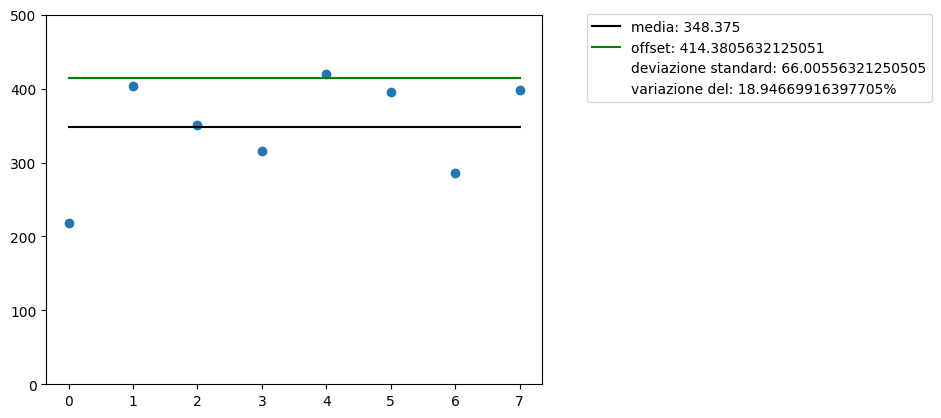

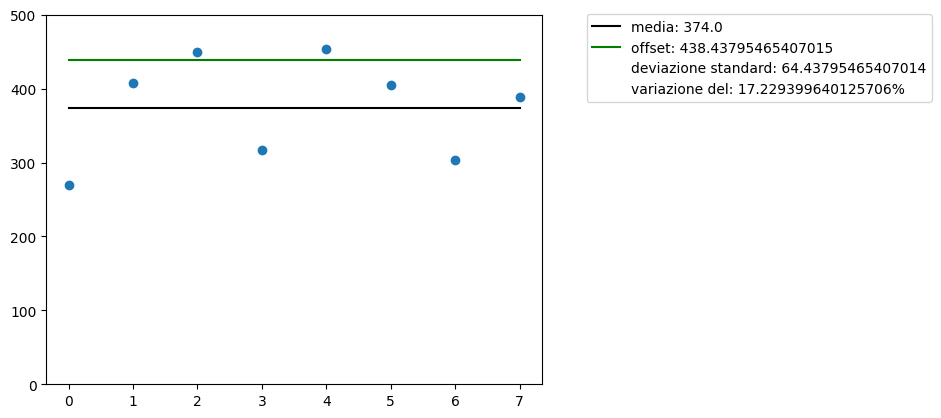

In [52]:
def plot_dev_standar(data: np.ndarray, media: float, ds: float):
  offset = media + ds
  fx = np.arange(data.size)

  plt.plot(fx, np.full(fx.size, media),   color="black",  label="media: " + str(media))
  plt.plot(fx, np.full(fx.size,offset),   color="green", label="offset: " + str(offset))
  plt.plot(0, 0, color="white", label="deviazione standard: " + str(ds))
  plt.plot(0, 0, color="white", label="variazione del: " + str((ds/ media) * 100)  + "%")
  plt.scatter(fx, data)

  plt.ylim(ymin=0, ymax= 500)
  plt.legend(bbox_to_anchor=(1.8, 1.02))
  plt.show()



dev_standard_femmine_20 = np.std(campione_femmine_20)
dev_standard_maschi_20  = np.std(campione_maschi_20)
# plot
plot_dev_standar(campione_femmine_20, media_femmine_20, dev_standard_femmine_20)
plot_dev_standar(campione_maschi_20, media_maschi_20, dev_standard_maschi_20)



\

**5.3 Scarto Interquartile**

Si calcola la differenza tra il 75-esimo percentile e il 25-esimo percentile (quantili espressi in percentuali).
Come per i quantili, il calcolo va effettuato su un insieme ordinato di elementi, in modo da dare una descrizione corente del livello di dispersione del dato.

In [53]:
def interquartile_range(data: np.ndarray):
  return np.quantile(data, 0.25) - np.quantile(data, 0.75)

**visualizzazione**

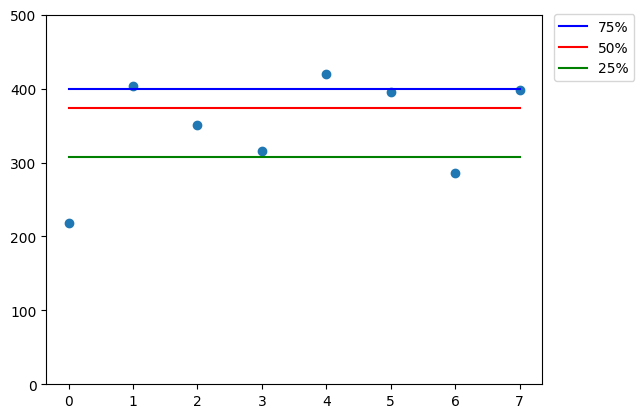

In [54]:
def plot_scarto_interquartile(data: np.ndarray):
  fx = np.arange(data.size)

  pi25 = np.quantile(campione_femmine_20, 0.25)
  pi50 = np.quantile(campione_femmine_20, 0.50)
  pi75 = np.quantile(campione_femmine_20, 0.75)

  plt.plot(fx, np.full(fx.size, pi75), color="blue", label="75%")
  plt.plot(fx, np.full(fx.size, pi50), color="red",   label="50%")
  plt.plot(fx, np.full(fx.size, pi25), color="green",  label="25%")

  plt.ylim(ymin=0, ymax= 500)
  plt.legend(bbox_to_anchor=(1.2, 1.02))
  plt.scatter(fx, data)
  plt.show()



plot_scarto_interquartile(campione_femmine_20)




# **N.B**

Anche la deviazione standard come la media è molto sensibile agli outlier, essendo la prima basata sulla seconda.
Lo scarto interquantile, agendo su un inseime ordinato, può offire in questi casi una rappresentazione del grado di dispersione molto più robusto.


Un' indicazione della presenza di anomalie o asimmetrie la si ha quando la deviazione standar risulti maggiore della media aritmetica.  





---


# **6. Z-Score**

---

Lo z-score riguarda l'analisi del singolo valore del campione preso in esame rispetto alla media.
Se la deviazione standard offre un'idea della quantità di variabilità nei dati,
lo z-score è (letteralmente) il numero di deviazioni standard che il singolo elemento ha dalla media atritmetica.

ad esempio:
\
z-score = 1 -> l'elemento calcolato è a una deviazione standard dalla media
\
z-score = 2 -> l'elemento calcolato è a due deviazioni standard dalla media
\
In genere un dataset comprende valori z-score tra -3 e 3, quindi significa che
i suoi dati si trovano entro le tre deviazioni standard sopra e sotto la media.

\begin{align}
  z  =  {x - \mu \over \sigma}
\end{align}

**python**

In [55]:

def z_score(x: float, mean: float, std: float) -> np.array:
  return (x - mean) / std

mean = np.mean(campione_femmine_20)
std = np.std(campione_femmine_20)

for x in campione_femmine_20:
  print(x, ": ", z_score(x, mean, std))


218.0 :  -1.975212295064545
403.0 :  0.8275817573760366
351.0 :  0.03976937506841366
315.0 :  -0.5056391972984022
420.0 :  1.0851358054381441
396.0 :  0.7215300905269335
286.0 :  -0.944996102816115
398.0 :  0.7518305667695343


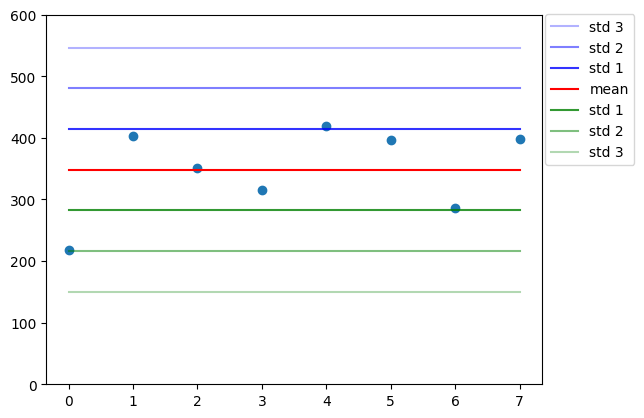

In [56]:
def standard_deviations(data: np.array):
  fx = np.arange(data.size)

  mean = np.mean(data)
  std  = np.std(data)

  std_p1 = mean + std
  std_p2 = mean + std * 2.0
  std_p3 = mean + std * 3.0

  std_n1 = mean - std
  std_n2 = mean - std * 2.0
  std_n3 = mean - std * 3.0

  plt.plot(fx, np.full(fx.size, std_p3),  color="blue", alpha = 0.3, label="std 3")
  plt.plot(fx, np.full(fx.size, std_p2),  color="blue", alpha = 0.5, label="std 2")
  plt.plot(fx, np.full(fx.size, std_p1),  color="blue", alpha = 0.8, label="std 1")
  plt.plot(fx, np.full(fx.size, mean),   color="red", label="mean")
  plt.plot(fx, np.full(fx.size, std_n1), color="green", alpha = 0.8, label="std 1")
  plt.plot(fx, np.full(fx.size, std_n2), color="green", alpha = 0.5, label="std 2")
  plt.plot(fx, np.full(fx.size, std_n3), color="green", alpha = 0.3, label="std 3")


  plt.ylim(ymin=0, ymax= 600)
  plt.legend(bbox_to_anchor=(1.2, 1.02))
  plt.scatter(fx, data)
  plt.show()



standard_deviations(campione_femmine_20)